<a href="https://colab.research.google.com/github/ary3120-droid/myproject/blob/main/12_18project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 데이터 살펴보기**

In [1]:
# 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option("display.max_columns", 100)
sns.set_theme(style="whitegrid")


In [2]:
# 1) 데이터 로드
df = pd.read_csv("insurance.csv")

# 2) 데이터 기본 확인
print("shape:", df.shape)
display(df.head())
display(df.tail())

# 3) 컬럼/자료형/결측치 확인
display(df.info())
display(df.isna().sum())

# 4) 중복행 확인
print("duplicates:", df.duplicated().sum())


shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


duplicates: 1


전체 관측치 수: 1,338개

변수 수: 7개

모든 변수에서 Non-Null Count = 1,338

결측치 없음

**수치형 변수 (4개)**

age (int)

bmi (float)

children (int)

charges (float, 타깃 변수)

**범주형 변수 (3개)**

sex

smoker

region

In [3]:
# 5) 기초 통계량(수치형)
display(df.describe())

# 6) 범주형 값 분포
cat_cols = ["sex", "smoker", "region"]
for c in cat_cols:
    print(f"\n[{c}] value counts")
    display(df[c].value_counts())


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



[sex] value counts


,count
sex,
male,676
female,662



[smoker] value counts


,count
smoker,
no,1064
yes,274



[region] value counts


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


남성: 676명

여성: 662명

> 거의 1:1에 가까운 균형
성별에 따른 비교 분석 시 표본 불균형으로 인한 편향 가능성은 낮다고 판단된다.

비흡연자: 1,064명

흡연자: 274명

→ 약 4 : 1 비율

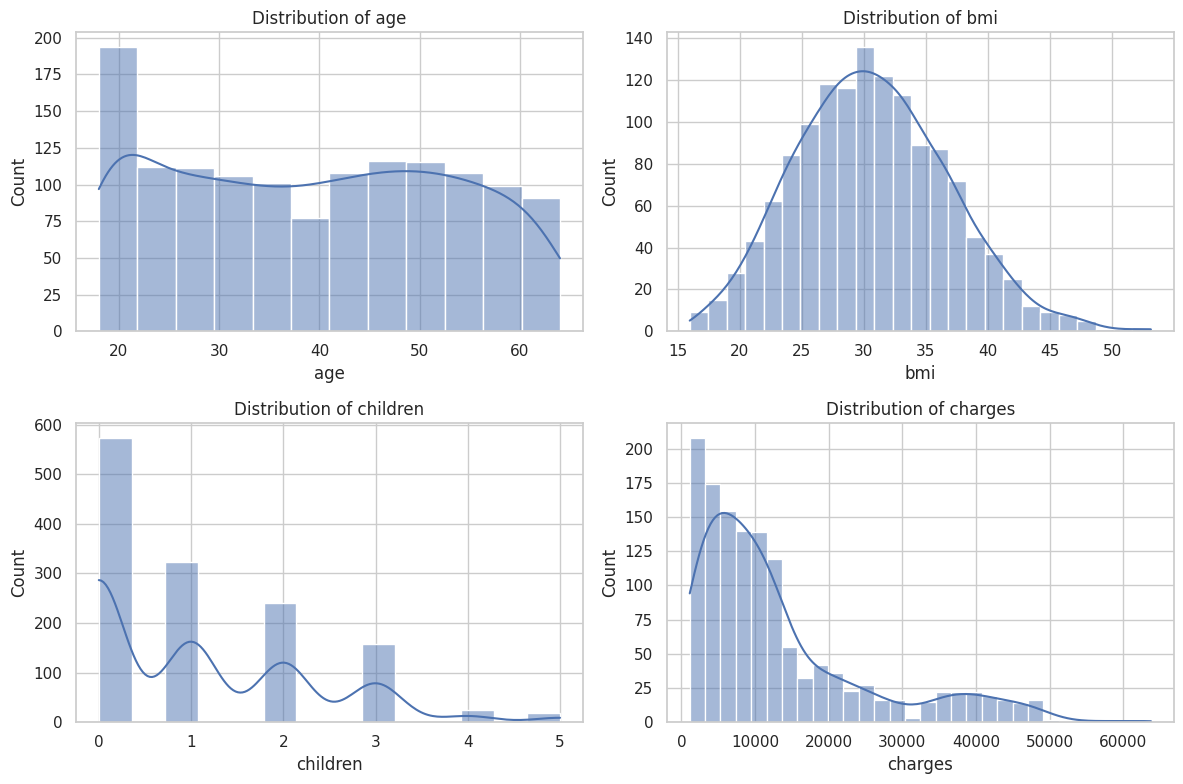

In [4]:
# 7) 수치형 분포 확인 (히스토그램 + KDE)
num_cols = ["age", "bmi", "children", "charges"]

plt.figure(figsize=(12, 8))
for i, c in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution of {c}")
plt.tight_layout()
plt.show()


age - 고르게 분포
bmi - 종 모양에 가까우나 약간의 오른쪽 꼬리로 40이상의 고 BMI 존재
children - 0이 가장 많다. 자녀 수가 증가할수록 빈도 감소
charges - 강한 오른쪽 꼬리 분포. 소수의 고액 의료비 관측치 존재

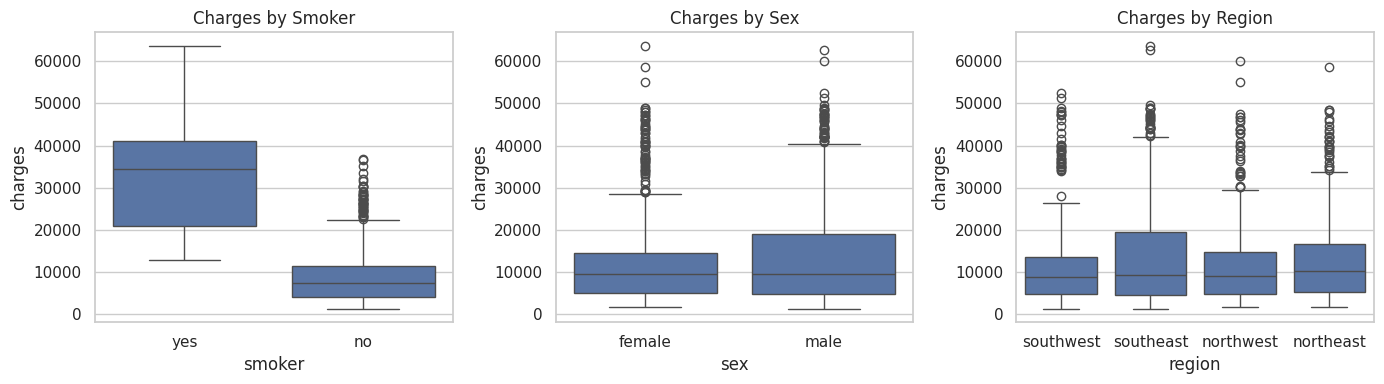

In [6]:
# 9) 집단 비교 시각화 (boxplot)
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="smoker", y="charges")
plt.title("Charges by Smoker")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="sex", y="charges")
plt.title("Charges by Sex")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x="region", y="charges")
plt.title("Charges by Region")

plt.tight_layout()
plt.show()


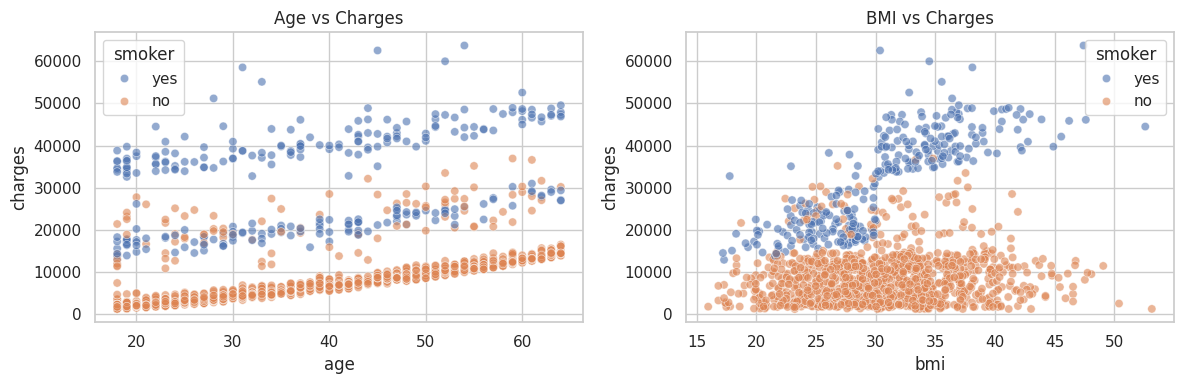

In [7]:
# 10) 연속형 관계 (scatter)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", alpha=0.6)
plt.title("Age vs Charges")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", alpha=0.6)
plt.title("BMI vs Charges")

plt.tight_layout()
plt.show()


나이가 증가할수록 의료비(charges)가 증가하는 양의 관계가 관찰됨
또한, 흡연 여부에 따라 의료비 분포가 뚜렷하게 분리되는 패턴이 관찰되었다.

동일한 연령 및 BMI 수준에서도 흡연자의 의료비가 비흡연자보다 전반적으로 높은 수준을 보여, 흡연 여부에 따른 의료비 차이를 검증할 필요성이 제기되었다.


BMI 증가에 따라 의료비가 증가하는 경향이 뚜렷함

특히 BMI 30 전후를 기준으로 의료비 수준이 분리

고BMI 구간에서 고액 의료비 관측치 다수 존재

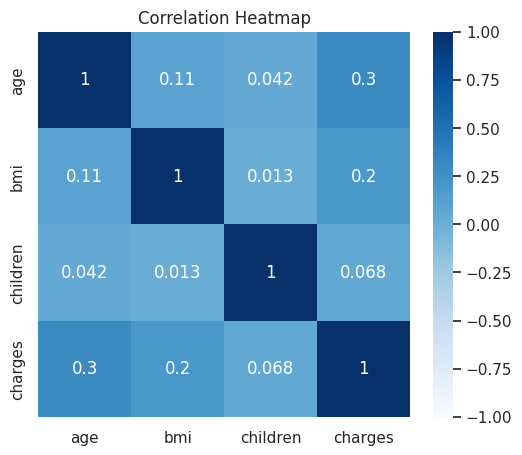

In [8]:
# 11) 상관관계(수치형만)
corr = df[["age", "bmi", "children", "charges"]].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


| 변수 쌍               |      상관계수 | 해석           |
| ------------------ | --------: | ------------ |
| age – charges      |  **0.30** | 중간 정도의 양의 상관 |
| bmi – charges      |  **0.20** | 약한 양의 상관     |
| children – charges | **0.068** | 거의 상관 없음     |
| age – bmi          |      0.11 | 매우 약한 상관     |
| age – children     |     0.042 | 거의 상관 없음     |
| bmi – children     |     0.013 | 거의 상관 없음     |


BMI와 의료비 간 상관계수는 0.20으로 약한 양의 상관관계를 보였으나, 이는 BMI가 의료비에 일정 수준의 영향을 미칠 가능성을 시사한다.

기술통계 및 시각화 분석 결과, 의료비는 강한 오른쪽 치우침을 보였으며 연령과 BMI는 의료비와 양의 관계를 나타냈다.

 상관분석에서는 연령과 의료비 간의 상관계수(r = 0.30)가 상대적으로 크게 나타난 반면, BMI와 의료비 간의 상관계수는 비교적 낮은 수준(r = 0.20)이었다. 그러나 산점도 분석을 통해 BMI 30을 기준으로 의료비 분포가 분리되는 패턴이 관찰되어, 비만 여부에 따른 의료비 평균 차이를 통계적으로 검증할 필요성이 제기되었다.

**가설 1** BMI 기준 집단 간 의료비 연관성

**가설 2** 흡연 여부에 따른 의료비

**가설 3** 흡연자의 BMI에 따른 의료비

In [19]:
#흡연자만 필터링
smoker_df = df[df["smoker"] == "yes"]


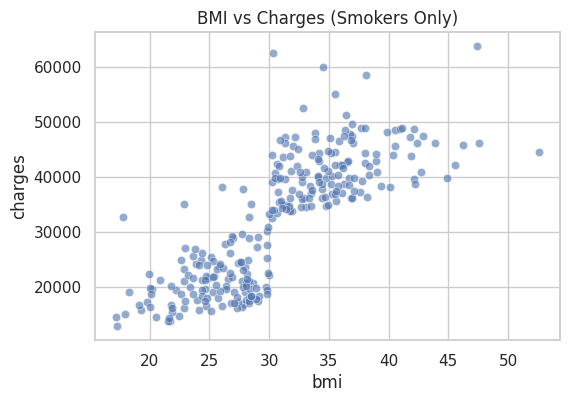

In [20]:
#흡연자 BMI vs 의료비 산점도
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=smoker_df,
    x="bmi",
    y="charges",
    alpha=0.6
)
plt.title("BMI vs Charges (Smokers Only)")
plt.show()


In [21]:
smoker_df[["bmi", "charges"]].corr()


,bmi,charges
bmi,1.000000,0.806481
charges,0.806481,1.000000


흡연자 집단 내에서도 BMI와 의료비의 양의 관계가 관찰됨
> 흡연 여부 자체뿐만이 아닌, 흡연자 내에서도 BMI 증가가 의료비 상승과 연관될 가능성을 시사한다.

**가설 1**

BMI 기준:

비비만 그룹: BMI < 30

비만 그룹: BMI ≥ 30

종속 변수: charges (의료비)

**H₀** (귀무가설)
비만 여부(BMI ≥ 30)에 따른 의료비 평균 차이는 없다.

**H₁** (대립가설)
비만 여부(BMI ≥ 30)에 따라 의료비 평균 차이는 있다.

(1) BMI 기준 집단 변수 생성

In [11]:
df["obese"] = (df["bmi"] >= 30).astype(int)

# 집단 크기 확인
df["obese"].value_counts()


,count
obese,
1,707
0,631


0: 비비만

1: 비만

(2) 집단별 의료비 기초 통계

In [12]:
df.groupby("obese")["charges"].describe()


,count,mean,std,min,25%,50%,75%,max
obese,,,,,,,,
0,631.0,10713.666901,7843.536999,1121.8739,4436.6788,8604.48365,14850.087900,38245.59327
1,707.0,15552.335469,14552.321382,1131.5066,5194.6588,9964.06000,20068.166695,63770.42801


비만 그룹의 평균 의료비가 더 높에 나타

(3) 정규성 간단 확인

In [14]:
from scipy.stats import shapiro

# 표본 크기 줄임 Shapiro
non_obese_sample = df.loc[df["obese"] == 0, "charges"].sample(300, random_state=42)
obese_sample = df.loc[df["obese"] == 1, "charges"].sample(300, random_state=42)

print("Non-obese:", shapiro(non_obese_sample))
print("Obese:", shapiro(obese_sample))


Non-obese: ShapiroResult(statistic=np.float64(0.9033694522424295), pvalue=np.float64(6.24196717870299e-13))
Obese: ShapiroResult(statistic=np.float64(0.7910924294113657), pvalue=np.float64(2.558472390692441e-19))


비비만 그룹 (BMI < 30)

W = 0.903

p-value ≈ 6.24 × 10⁻¹³

비만 그룹 (BMI ≥ 30)

W = 0.791

p-value ≈ 2.56 × 10⁻¹⁹

해석

두 집단 모두 p-value < 0.05

→ 정규성 가정 기각

Shapiro–Wilk 정규성 검정 결과, 비비만 그룹과 비만 그룹 모두에서 의료비 분포가 정규성을 만족하지 않는 것으로 나타났다(p < 0.05). 이는 의료비 데이터가 정규분포 가정을 충족하지 않음을 의미한다.

또한 의료비 분포의 비정규성과 집단 간 분산 차이 가능성을 고려하여, 등분산을 가정하지 않는 Welch t-test를 적용하여 집단 간 의료비 평균 차이를 검정하였다.

한편 표본 수가 충분히 크기 때문에 중심극한정리에 따라 평균 비교는 가능하다고 판단하였으며, 보다 보수적인 접근을 위해 Welch t-test를 사용하였다.

(4) 등분산성 검정 (Levene)

In [15]:
from scipy.stats import levene

non_obese = df.loc[df["obese"] == 0, "charges"]
obese = df.loc[df["obese"] == 1, "charges"]

stat, p = levene(non_obese, obese)
print(f"Levene test p-value: {p:.4f}")


Levene test p-value: 0.0000


p < 0.05 → 등분산 가정 불가

비비만 그룹은
의료비가 비교적 고르게 퍼져 있음

비만 그룹에선,
퍼짐이 훨씬 큼

따라서
두 그룹을 같은 기준으로 평균 비교하면 불공정하다 생각했다.

Levene 검정 결과, 두 집단 간 분산 차이가 유의미하게 나타나 등분산 가정이 성립하지 않았으므로 Welch t-test를 적용하였다.

(5) 평균 차이 검정 (Welch t-test)

In [16]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    non_obese,
    obese,
    equal_var=False  # Welch
)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")


t-statistic: -7.6792
p-value: 0.000000


Welch t-test 결과, 비만 여부에 따른 의료비 평균 차이는 통계적으로 유의미한 것으로 나타났다(t = -7.68, p < 0.001). 이에 따라 귀무가설을 기각하며, 비만 그룹의 의료비 평균이 비비만 그룹보다 유의미하게 높다고 판단할 수 있다.

**회귀분석을 통한 관계 규명 및 예측**

In [22]:
#변수 정의
X = df[["bmi"]]      # 독립변수
y = df["charges"]   # 종속변수


In [23]:
#단순 선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

coef, intercept, r2


(np.float64(393.87303079739524),
 np.float64(1192.9372089611497),
 0.03933913991786264)

회귀계수(coef)
→ 393.87

절편(intercept)
→ 1192.94

결정계수(R²)
→ 0.0393

핵심 숫자

BMI 계수 = 393.87

다른 조건이 같을 때, BMI가 1 증가하면 의료비는 평균적으로 약 394달러 증가한다.

절편 = 1192.94

뜻:

BMI가 0일 때의 이론적인 의료비

단순 선형회귀분석 결과, BMI는 의료비에 유의미한 양의 영향을 미치는 변수로 나타났으나, 결정계수가 낮아 의료비는 BMI 외에도 다양한 요인에 의해 설명됨을 확인할 수 있었다.

의료비(charges)를 종속변수로, BMI를 독립변수로 설정하여 단순 선형회귀분석을 수행하였다. 분석 결과, 다른 조건이 동일할 때 BMI가 1 증가할 경우 의료비는 평균적으로 약 394달러 증가하는 것으로 나타났다. 한편 결정계수(R²)는 0.039로, BMI 단일 변수만으로는 의료비 변동의 일부만 설명할 수 있음을 확인하였다.

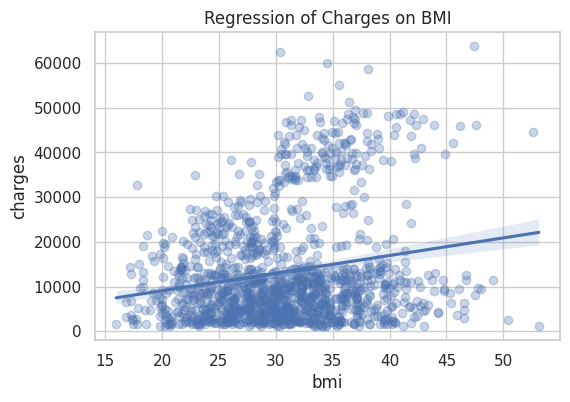

In [26]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"alpha":0.3})
plt.title("Regression of Charges on BMI")
plt.show()


위 그림은 BMI를 독립변수로 한 단순 선형회귀 결과를 시각화한 것으로, BMI 증가에 따라 의료비가 증가하는 평균적인 추세를 보여준다. 다만 산점도가 회귀선 주변에 넓게 분포되어 있어, 의료비는 BMI 외에도 다양한 요인의 영향을 받는 것으로 해석된다.